# Text Classification Project

## Goal: Given a set of text movie reviews that have been labeled negative or positive

***
### 1. Data

The dataset comes from this site:
http://ai.stanford.edu/~amaas/data/sentiment/

The data has to columns:
- label - with neg or pos value
- review - with the text of review

Reading data.

In [3]:
import pandas as pd
df = pd.read_csv('moviereviews.csv')

First five values in DataFrame.

In [5]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


Random samples from DataFrame.

In [7]:
df.sample(5)

,label,review
1992,neg,"say , tell me if you've seen this before : a c..."
1204,pos,NaN
1060,neg,violence is bad . \r\nviolence is ugly . \r\nv...
1239,pos,the american action film has been slowly drown...
214,neg,""" return to horror high , "" wants to be a cou..."


***
### 2. Data Preparation

Checking null values.

In [9]:
df.isnull().sum()

label      0
review    35
dtype: int64

There are 35 rows without any value so we have to remove it.

In [10]:
df = df.dropna()

Review could be a blank string which means it may contains only whitespaces.

In [13]:
df['review'].str.isspace().sum()

27

In [14]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


This 27 rows have blank review column.

Removing blank columns.

In [17]:
blanks = df.review.str.isspace()

In [18]:
df = df.drop(df[blanks].index)

***
### 3. Data Analysis

Firstly, let's check amount of postitive and negative reviews.

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

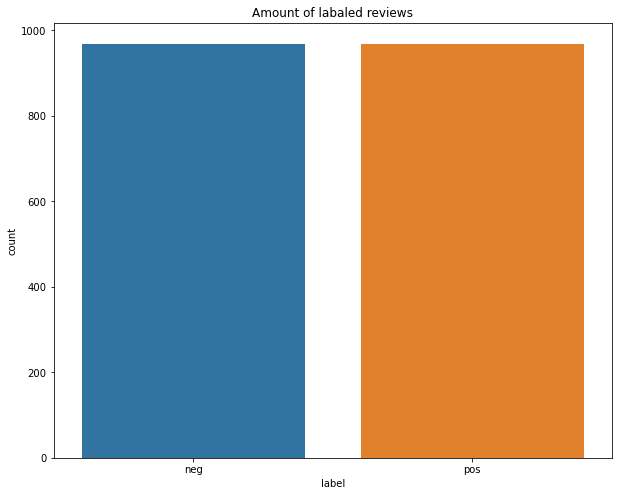

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='label')
plt.title('Amount of labaled reviews');

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


Both labels have the same amount of reviews.

# 

Now let's check the most common words in negative and positive reviews.

Converting text to matrix of token counts.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
cv = CountVectorizer(stop_words='english')

In [33]:
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [34]:
warnings.filterwarnings("ignore")
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


***
### 4. Creating a model 

Splitting the data into traing and test features.

In [37]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Creating a PipeLine thath will create Tf-idf Vector out of the raw data and fit Naive Bayes classifier.

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [40]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('mlb', MultinomialNB()),])

Training the model.

In [42]:
pipe.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('mlb', MultinomialNB())])

***
### 5. Model Performance Evaluation

In [43]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [44]:
preds = pipe.predict(X_test)

In [45]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.75      0.92      0.83       191
         pos       0.90      0.70      0.79       197

    accuracy                           0.81       388
   macro avg       0.83      0.81      0.81       388
weighted avg       0.83      0.81      0.81       388



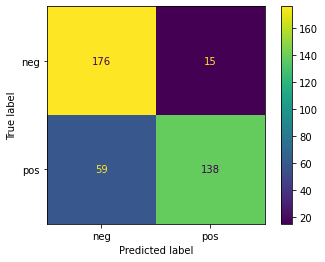

In [47]:
plot_confusion_matrix(pipe,X_test,y_test);

### Summary:
Model has some errors but we are getting around 80% of precision, recall and accuracy.

Let's test the model on simple examples

In [48]:
review = "That film was really bad"

In [50]:
print(pipe.predict([review]))

['neg']


In [61]:
review = "Very good film"

In [62]:
print(pipe.predict([review]))

['pos']
